# Analysing your results

In [1]:
import vstt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import

To import an experiment from a psydat file:

In [2]:
experiment = vstt.Experiment("example.psydat")

### Conditions

The trial conditions are in `trial_list`, each element in this list is a dict of trial conditions that defines a trial:

In [3]:
experiment.trial_list

[{'weight': 2,
  'num_targets': 8,
  'target_order': 'clockwise',
  'target_indices': '0 1 2 3 4 5 6 7',
  'target_duration': 5.0,
  'inter_target_duration': 0.0,
  'target_distance': 0.4,
  'target_size': 0.04,
  'central_target_size': 0.02,
  'show_inactive_targets': True,
  'play_sound': True,
  'show_cursor': True,
  'cursor_size': 0.02,
  'show_cursor_path': True,
  'automove_cursor_to_center': False,
  'cursor_rotation_degrees': 0.0,
  'post_trial_delay': 0.0,
  'post_trial_display_results': False,
  'post_block_delay': 0.0,
  'post_block_display_results': True},
 {'weight': 2,
  'num_targets': 6,
  'target_order': 'random',
  'target_indices': '2 5 0 4 1 3',
  'target_duration': 5.0,
  'inter_target_duration': 0.0,
  'target_distance': 0.4,
  'target_size': 0.04,
  'central_target_size': 0.02,
  'show_inactive_targets': True,
  'play_sound': True,
  'show_cursor': True,
  'cursor_size': 0.02,
  'show_cursor_path': True,
  'automove_cursor_to_center': True,
  'cursor_rotation_deg

This can be more easily viewed if converted to a pandas DataFrame:

In [4]:
pd.DataFrame(experiment.trial_list)

,weight,num_targets,target_order,target_indices,target_duration,inter_target_duration,target_distance,target_size,central_target_size,show_inactive_targets,play_sound,show_cursor,cursor_size,show_cursor_path,automove_cursor_to_center,cursor_rotation_degrees,post_trial_delay,post_trial_display_results,post_block_delay,post_block_display_results
0,2,8,clockwise,0 1 2 3 4 5 6 7,5.0,0.0,0.4,0.04,0.02,True,True,True,0.02,True,False,0.0,0.0,False,0.0,True
1,2,6,random,2 5 0 4 1 3,5.0,0.0,0.4,0.04,0.02,True,True,True,0.02,True,True,0.0,0.0,False,0.0,True


The `weight` of a trial is how many times it should be repeated.

### Results

The results of the trials are in `stats` which provides both the raw data and calculated statistics as a pandas DataFrame:

In [5]:
stats = experiment.stats

In [6]:
stats.head()

,i_trial,i_rep,i_target,condition_index,target_index,target_pos,to_target_timestamps,to_target_mouse_positions,to_target_success,center_pos,...,to_target_distance,to_target_reaction_time,to_target_time,to_target_movement_time,to_target_rmse,to_center_distance,to_center_reaction_time,to_center_time,to_center_movement_time,to_center_rmse
0,0,0,0,0,0,"[0.0, 0.4]","[0.0, 0.0001590251922607422, 0.010089159011840...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",True,"[0.0, 0.0]",...,0.411747,0.298838,0.924759,0.625921,0.011987,0.523959,0.000184,0.525745,0.525561,0.023938
1,0,0,1,0,1,"[0.282842712474619, 0.28284271247461906]","[0.0, 0.00019407272338867188, 0.01045894622802...","[[0.0, 0.0], [0.0, 0.0], [-0.00092592592592592...",True,"[0.0, 0.0]",...,0.384438,0.010459,0.409134,0.398675,0.025578,0.407386,0.000178,0.494182,0.494004,0.031541
2,0,0,2,0,2,"[0.4, 2.4492935982947065e-17]","[0.0, 0.0002090930938720703, 0.010582923889160...","[[0.0, 0.0], [0.0, 0.0], [-0.00277777777777777...",True,"[0.0, 0.0]",...,0.384725,0.010583,0.323711,0.313128,0.012188,0.514236,0.000178,0.438579,0.438401,0.036397
3,0,0,3,0,3,"[0.28284271247461906, -0.282842712474619]","[0.0, 0.00017309188842773438, 0.01132202148437...","[[0.0, 0.0], [0.0, 0.0], [-0.00925925925925925...",True,"[0.0, 0.0]",...,0.413905,0.011322,0.349227,0.337905,0.023649,0.437470,0.000173,0.534803,0.534630,0.015697
4,0,0,4,0,4,"[4.898587196589413e-17, -0.4]","[0.0, 0.00017595291137695312, 0.01025795936584...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",True,"[0.0, 0.0]",...,0.382848,0.070822,0.461818,0.390996,0.027531,0.403142,0.000169,0.468244,0.468075,0.013810


- each row in this DataFrame contains the data from a single movement to a target (and optionally back to the center)
- they are in the order that they were shown in the experiment
- `condition_index` is the index of the corresponding trial conditions in `trial_index`

In [7]:
stats.describe()

,i_trial,i_rep,i_target,condition_index,target_index,to_target_distance,to_target_reaction_time,to_target_time,to_target_movement_time,to_target_rmse,to_center_distance,to_center_reaction_time,to_center_time,to_center_movement_time,to_center_rmse
count,28.000000,28.0,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,16.000000,16.000000,16.000000,16.000000
mean,1.357143,0.0,3.071429,0.428571,3.071429,0.438758,0.052600,0.510267,0.457667,0.035591,0.256364,0.000174,0.479244,0.479070,0.021105
std,1.129218,0.0,2.159022,0.503953,2.159022,0.101572,0.094003,0.224884,0.205535,0.036838,0.228045,0.000014,0.051588,0.051592,0.012684
min,0.000000,0.0,0.000000,0.000000,0.000000,0.365861,0.000189,0.219320,0.167035,0.002466,0.000000,0.000134,0.367237,0.367079,0.005543
25%,0.000000,0.0,1.000000,0.000000,1.000000,0.382445,0.010280,0.336458,0.307856,0.013773,0.000000,0.000169,0.444702,0.444525,0.014123
50%,1.000000,0.0,3.000000,0.000000,3.000000,0.396148,0.010531,0.448075,0.411260,0.024440,0.409229,0.000175,0.484292,0.484108,0.017945
75%,2.000000,0.0,5.000000,1.000000,5.000000,0.427404,0.026416,0.688938,0.576150,0.033464,0.441702,0.000184,0.526041,0.525861,0.025839
max,3.000000,0.0,7.000000,1.000000,7.000000,0.750078,0.392244,1.054031,1.043825,0.140773,0.523959,0.000192,0.542130,0.541954,0.050884


### Plot statistics
Here we plot a few of the calculated statics for each target, identifying each set of conditions with a different color:

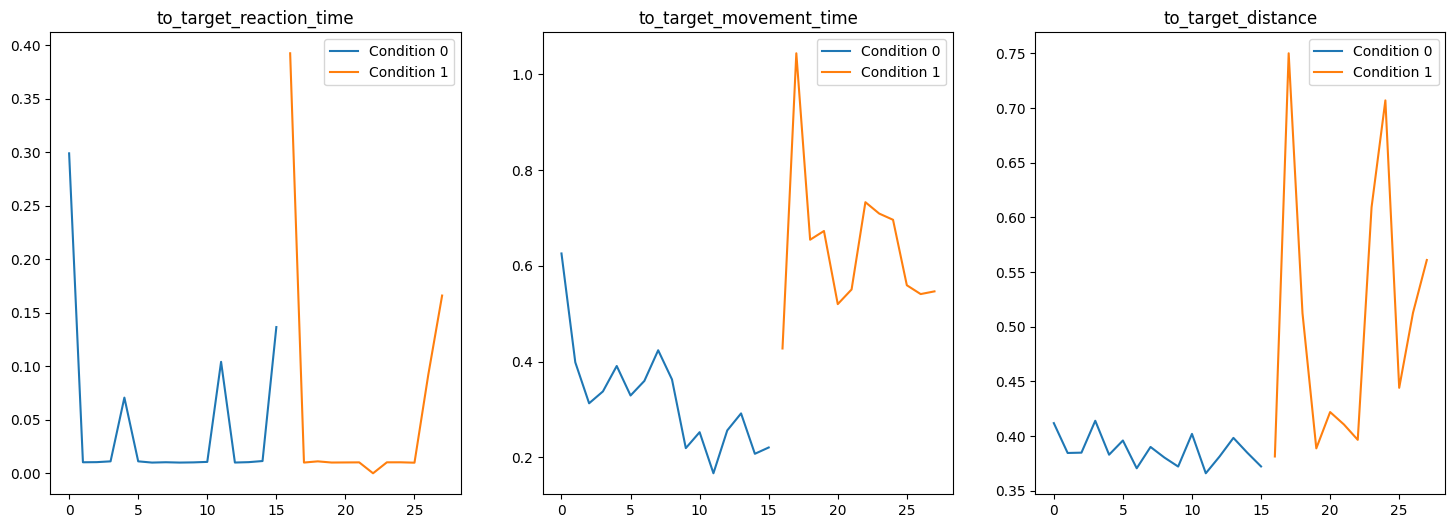

In [8]:
fig, axs = plt.subplots(ncols=3, figsize=(18, 6))
for ax, statistic in zip(
    axs, ["to_target_reaction_time", "to_target_movement_time", "to_target_distance"]
):
    ax.set_title(f"{statistic}")
    for condition_index, df in stats.groupby("condition_index"):
        ax.plot(df.index, df[statistic], label=f"Condition {condition_index}")
    ax.legend()
plt.show()